## 1a

In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
dt = 0.001
time = np.linspace(0,1,1000)

In [17]:
clean = [np.sin(2*np.pi*50*t) + np.sin(2*np.pi*120*t) for t in time]

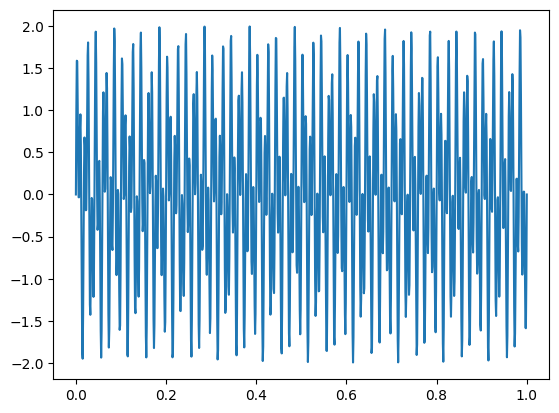

In [18]:
plt.plot(time,clean)

In [19]:
noisy = clean + 2.5*np.random.randn(len(time))

Text(0, 0.5, 'y')

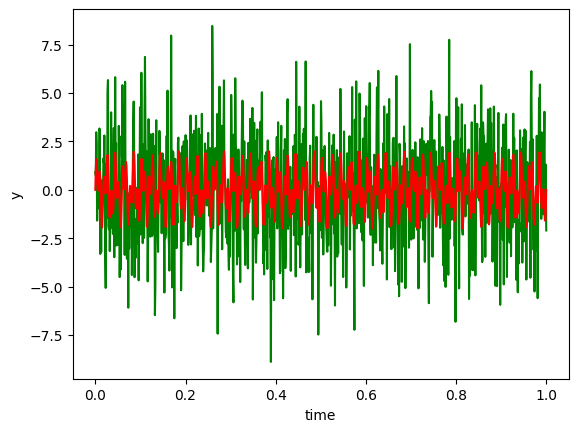

In [51]:
plt.plot(time, noisy, '-g')
plt.plot(time, clean, '-r')
plt.xlabel("time")
plt.ylabel("y")

In [52]:
from scipy.fft import fft, fftshift,fftfreq

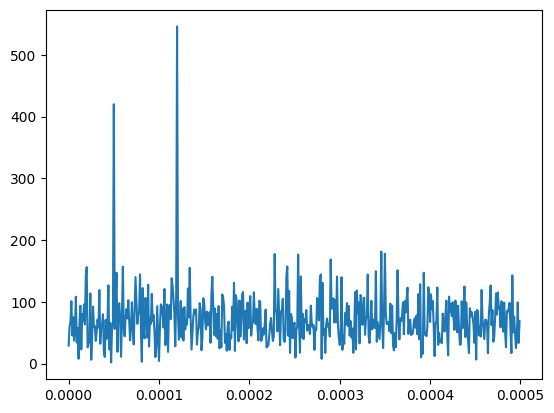

In [82]:
dk = fft(noisy)
N = np.size(noisy)
xk = fftfreq(N, 1.0/dt)
total_k = dk
dk = fft(noisy)[:N//2] 
#it is symmetric so we take only half the data
xk = fftfreq(N, 1.0/dt)[:N//2]
plt.plot(xk, np.abs(dk))

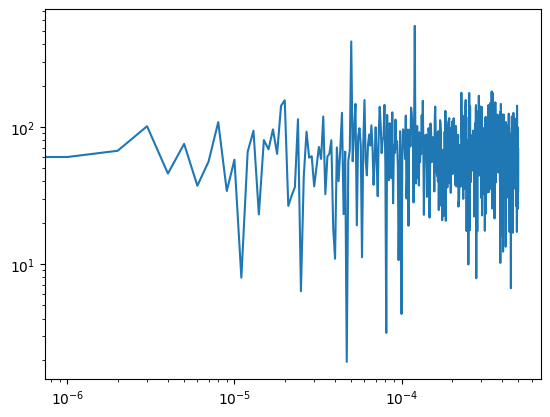

In [83]:
plt.loglog(xk, np.abs(dk))


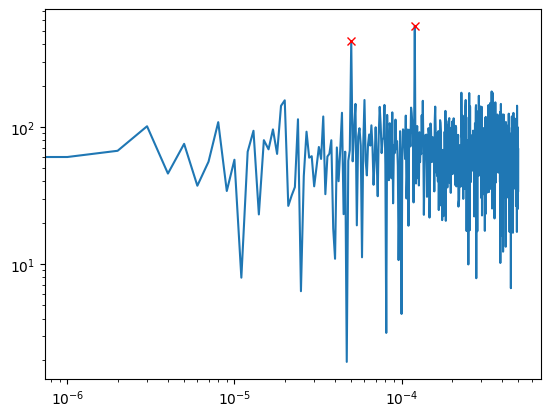

In [84]:
from scipy.signal import find_peaks

plt.plot(xk,np.abs(dk))
peaks, _ = find_peaks(np.abs(dk), height= 2e2 , distance=70)
# peaks is the indices..
plt.loglog(xk[peaks], np.abs(dk[peaks]), 'xr')

In [85]:
print(xk[peaks])

[5.0e-05 1.2e-04]


In [86]:
threshold = 30

In [87]:
reconstructed = []

for d in total_k:
    if np.abs(d) > threshold:
        reconstructed.append(d)
    else:
        reconstructed.append(0)

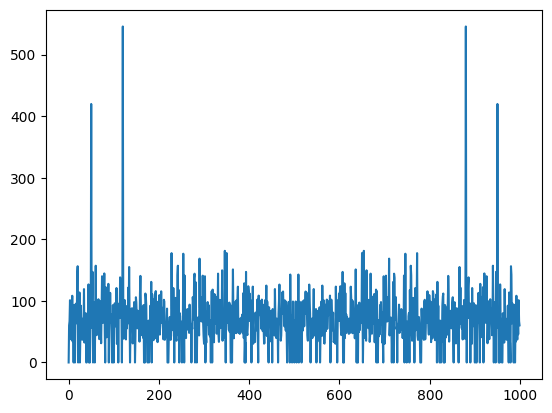

In [89]:
plt.plot(np.abs(reconstructed))

In [90]:
from scipy.fft import ifft

In [91]:
new = ifft(reconstructed)

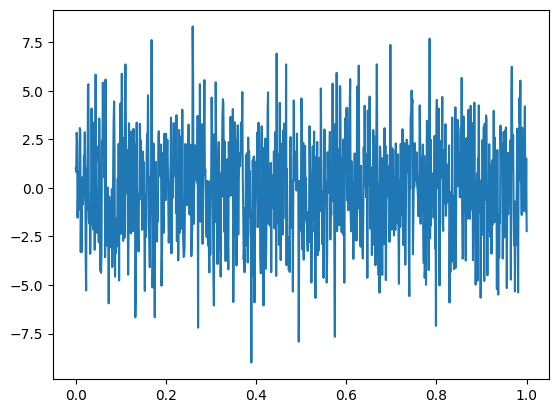

In [92]:
plt.plot(time, new)

## 1b 

In [97]:
import scipy.io.wavfile as sw

sam, d = sw.read("CLASS_TEST_2/metal.wav")

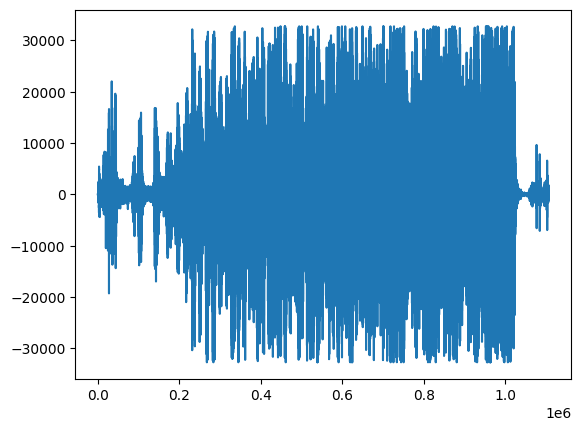

In [98]:
plt.plot(d)

Text(0, 0.5, 'Metal noise')

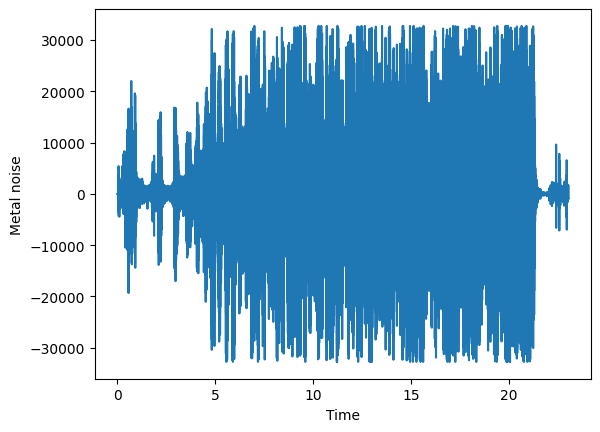

In [99]:
N = np.size(d)
t = np.arange(N)*1.0/sam
plt.plot(t,d)
plt.xlabel("Time")
plt.ylabel("Metal noise")

In [100]:
from scipy.fft import fft, fftfreq

In [116]:
dk = fft(d)
total_k = dk

In [117]:
xk = fftfreq(N, 1.0/sam)
print(xk)

[ 0.          0.04340278  0.08680556 ... -0.13020833 -0.08680556
 -0.04340278]


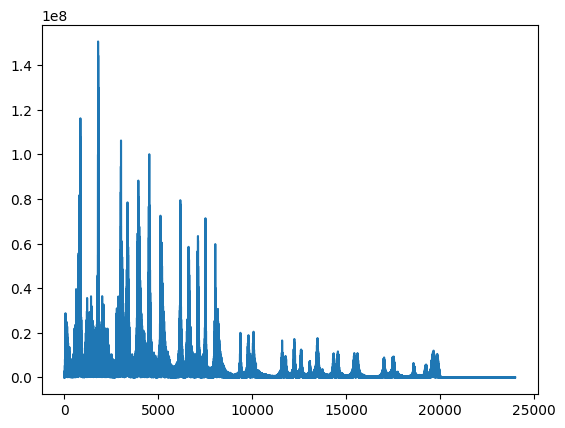

In [118]:
dk = fft(d)[:N//2] 
#it is symmetric so we take only half the data
xk = fftfreq(N, 1.0/sam)[:N//2]
plt.plot(xk, np.abs(dk))

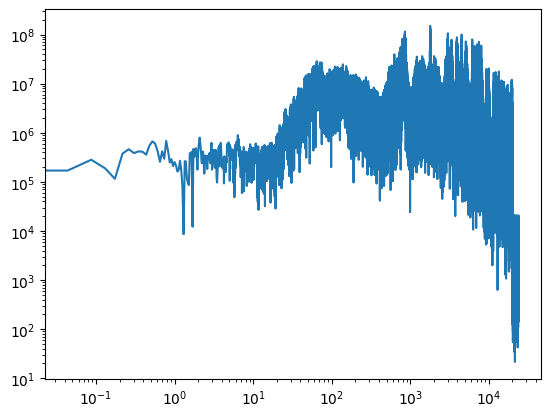

In [119]:
plt.loglog(xk, np.abs(dk))

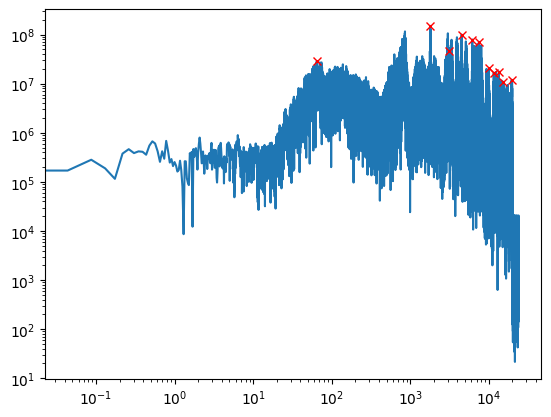

In [120]:
from scipy.signal import find_peaks

plt.plot(xk,np.abs(dk))
peaks, _ = find_peaks(np.abs(dk), height= 1e7 , distance=3e4)
# peaks is the indices..
plt.loglog(xk[peaks], np.abs(dk[peaks]), 'xr')

In [121]:
peaks

array([  1490,  41468,  71507, 104258, 142311, 173156, 232111, 267159,
       310564, 355685, 452857])

In [123]:
threshold = 1e6

In [124]:
reconstructed = []

In [125]:
for d in total_k:
    if (np.abs(d) > threshold):
        reconstructed.append(d)
    else:
        reconstructed.append(0)

In [126]:
reconstructed = reconstructed[:N//2]

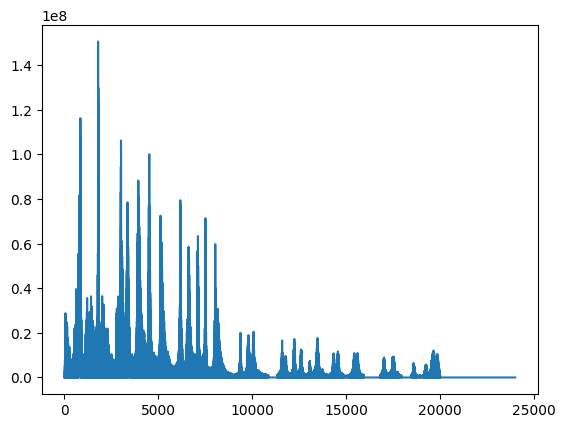

In [128]:
plt.plot(xk,np.abs(reconstructed))

## 2

In [129]:
import pyromat as pm

In [131]:
pm.config

     config_file : ['/opt/homebrew/lib/python3.12/site-packages/pyrom...
  config_verbose : False
         dat_dir : ['/opt/homebrew/lib/python3.12/site-packages/pyrom...
 dat_exist_fatal : False
   dat_overwrite : True
   dat_recursive : True
     dat_verbose : False
           def_T : 298.15
      def_T_unit : 'K'
         def_oob : nan
           def_p : 1.01325
      def_p_unit : 'bar'
   error_verbose : True
     install_dir : '/opt/homebrew/lib/python3.12/site-packages/pyromat'
         reg_dir : ['/opt/homebrew/lib/python3.12/site-packages/pyrom...
 reg_exist_fatal : False
   reg_overwrite : True
     reg_verbose : False
     unit_energy : 'kJ'
      unit_force : 'N'
     unit_length : 'm'
       unit_mass : 'kg'
     unit_matter : 'kg'
      unit_molar : 'kmol'
   unit_pressure : 'bar'
unit_temperature : 'K'
       unit_time : 's'
     unit_volume : 'm3'
         version : '2.2.5'
 warning_verbose : True

In [135]:
fluid = pm.get("mp.C2H2F4")

t1 = -10 + 273.15
t4 = t1
t3 = 55 + 273.15
t2dash = t3

x1 = 1
x2dash = 1
x3 = 0

In [133]:
## Compressor analysis

In [137]:
h1 = fluid.hs(T=t1)[1]

In [138]:
h1

array([392.66547446])

In [139]:
s1 = fluid.ss(T=t1)[1]

In [140]:
s2 = s1

In [142]:
## condensor

In [145]:
p3 = fluid.ps(T=t3)

In [150]:
p2 = p3

t2 = fluid.T(p=p2, s=s2)
t2

array([335.61232739])

In [153]:
h2 = fluid.h(p=p2, T=t2)
h2

array([434.55689364])

In [157]:
h3 =fluid.hs(p=p3)[0]

In [160]:
## expansion valve analysis

In [158]:
h4 = h3

In [159]:
h4

array([279.47154048])

In [163]:
q_evaporator = h1 - h4

In [164]:
q_evaporator

array([113.19393398])

In [165]:
cop = (h1-h4)/(h2-h1)
cop

array([2.70207924])

## 3

In [311]:
import os
folder = "CLASS_TEST_2/compound_droplet"
images = sorted(os.listdir(folder))

In [312]:
import cv2

In [313]:
def display_image(image, title="image", subplot=None):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    if subplot:
        plt.subplot(subplot)
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')

In [314]:
time = []
inner_deform = []
outer_deform = []

In [315]:
for filename in images:
    img = cv2.imread(f"{folder}/{filename}")

    a,x,y,z = filename[0], filename[1], filename[2], filename[3]
    num = int(x+y+z)
    t = (num- 1)/10

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Threshold the image
    ret, imgth = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)
    
    kernel = np.ones((5, 5), np.uint8)
    filled_image = cv2.morphologyEx(imgth, cv2.MORPH_OPEN, kernel)
    
    edge = cv2.Canny(filled_image, 100, 150)

    contours, _ = cv2.findContours(edge, cv2.RETR_EXTERNAL , cv2.CHAIN_APPROX_NONE)
    
    copied = img.copy()

    if contours:
        cnt = max(contours, key=cv2.contourArea)
        max_area = cv2.contourArea(cnt)
        smax_area = -1
        scnt=None
        for cont in contours:
            smaxi = cv2.contourArea(cnt)
            if(smaxi > smax_area and smaxi is not max_area):
                scnt = cont
                smax_area = smaxi

    

        if (len(cnt) <5 or len(scnt)<5):
            continue


        # we have the two contours
        ellipse1 = cv2.fitEllipse(cnt)
        ellipse2 = cv2.fitEllipse(scnt)           
    
        # Calculate the deformation
        major_axis1, minor_axis1 = ellipse1[1]
        major_axis2, minor_axis2 = ellipse2[1]

        deformation1 = abs(major_axis1 - minor_axis1) / (major_axis1 + minor_axis1)
        deformation2 = abs(major_axis2 - minor_axis2) / (major_axis2 + minor_axis2)
        
        time.append(t)
        inner_deform.append(deformation1)
        outer_deform.append(deformation2)

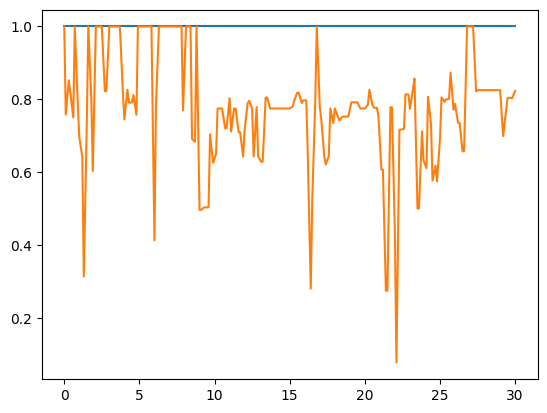

In [316]:
# plt.plot(inner_deform)
plt.plot(time,outer_deform)
plt.plot(time,inner_deform)